In [2]:
# Dependencies and Setup
import requests
import time
import pandas as pd
from pprint import pprint

In [3]:
base_url = 'https://api.opencovid.ca/summary?geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json'
response = requests.get(base_url).json()
pprint(response)

{'data': [{'cases': 630824.0,
           'cases_daily': 0.0,
           'date': '2023-04-06',
           'deaths': 5653.0,
           'deaths_daily': 0.0,
           'hospitalizations': 485.0,
           'hospitalizations_daily': 0.0,
           'icu': 19.0,
           'icu_daily': 0.0,
           'region': 'AB',
           'tests_completed': 7446460.0,
           'tests_completed_daily': 0.0,
           'vaccine_administration_dose_1': 3619485.0,
           'vaccine_administration_dose_1_daily': 0.0,
           'vaccine_administration_dose_2': 3446403.0,
           'vaccine_administration_dose_2_daily': 0.0,
           'vaccine_administration_dose_3': 1824179.0,
           'vaccine_administration_dose_3_daily': 0.0,
           'vaccine_administration_dose_4': 838597.0,
           'vaccine_administration_dose_4_daily': 0.0,
           'vaccine_administration_total_doses': 9728664.0,
           'vaccine_administration_total_doses_daily': 0.0,
           'vaccine_coverage_dose_1': 79.7,


In [4]:
provinces = []
for province in response['data']:
    provinces.append(province['region'])
provinces_df=pd.DataFrame({
    "Province":provinces
})
provinces_df

,Province
0,AB
1,BC
2,MB
3,NB
4,NL
5,NS
6,NT
7,NU
8,ON
9,PE


In [5]:
provinces_df["Date"]=""
provinces_df["Cases"]=""
provinces_df["Deaths"]=""
provinces_df["Hospitalizations"]=""
provinces_df["ICU"]=""
provinces_df["Tests Completed"]=""
provinces_df["Vaccine dose:1 "]=""
provinces_df["Booster vaccine: 2"]=""
provinces_df["Booster vaccine: 3"]=""
provinces_df["Booster vaccine: 4"]=""
provinces_df["Total vaccine"]=""
provinces_df["Vaccine coverage dose:1"]=""
provinces_df["Vaccine coverage booster:2"]=""
provinces_df["Vaccine coverage booster:3"]=""
provinces_df["Vaccine coverage booster:4"]=""
provinces_df


,Province,Date,Cases,Deaths,Hospitalizations,ICU,Tests Completed,Vaccine dose:1,Booster vaccine: 2,Booster vaccine: 3,Booster vaccine: 4,Total vaccine,Vaccine coverage dose:1,Vaccine coverage booster:2,Vaccine coverage booster:3,Vaccine coverage booster:4
0,AB,,,,,,,,,,,,,,,
1,BC,,,,,,,,,,,,,,,
2,MB,,,,,,,,,,,,,,,
3,NB,,,,,,,,,,,,,,,
4,NL,,,,,,,,,,,,,,,
5,NS,,,,,,,,,,,,,,,
6,NT,,,,,,,,,,,,,,,
7,NU,,,,,,,,,,,,,,,
8,ON,,,,,,,,,,,,,,,
9,PE,,,,,,,,,,,,,,,


In [6]:
for index, row in provinces_df.iterrows():
    province=row['Province']
    per_province_url=f"https://api.opencovid.ca/summary?loc={province}"
    response=requests.get(per_province_url).json()
    
    provinces_df.loc[index,"Date"]=response["data"][0]["date"]
    provinces_df.loc[index,"Vaccine dose:1 "]=response["data"][0]["vaccine_administration_dose_1"]
    provinces_df.loc[index,"Booster vaccine: 2"]=response["data"][0]["vaccine_administration_dose_2"]
    provinces_df.loc[index,"Booster vaccine: 3"]=response["data"][0]["vaccine_administration_dose_3"]
    provinces_df.loc[index,"Booster vaccine: 4"]=response["data"][0]["vaccine_administration_dose_4"]
    provinces_df.loc[index,"Total vaccine"]=response["data"][0]["vaccine_administration_total_doses"]
    provinces_df.loc[index,"Vaccine coverage dose:1"]=response["data"][0]["vaccine_coverage_dose_1"]
    provinces_df.loc[index,"Vaccine coverage booster:2"]=response["data"][0]["vaccine_coverage_dose_2"]
    provinces_df.loc[index,"Vaccine coverage booster:3"]=response["data"][0]["vaccine_coverage_dose_3"]
    provinces_df.loc[index,"Vaccine coverage booster:4"]=response["data"][0]["vaccine_coverage_dose_4"]
    provinces_df.loc[index,"Cases"]=response["data"][0]["cases"]
    provinces_df.loc[index,"Deaths"]=response["data"][0]["deaths"]  
    provinces_df.loc[index,"Hospitalizations"]=response["data"][0]["hospitalizations"]  
    provinces_df.loc[index,"ICU"]=response["data"][0]["icu"]
    provinces_df.loc[index,"Tests Completed"]=response["data"][0]["tests_completed"]

In [7]:
provinces_df.head(12)

,Province,Date,Cases,Deaths,Hospitalizations,ICU,Tests Completed,Vaccine dose:1,Booster vaccine: 2,Booster vaccine: 3,Booster vaccine: 4,Total vaccine,Vaccine coverage dose:1,Vaccine coverage booster:2,Vaccine coverage booster:3,Vaccine coverage booster:4
0,AB,2023-04-06,630824.0,5653.0,485.0,19.0,7446460.0,3619485.0,3446403.0,1824179.0,838597.0,9728664.0,79.7,75.9,40.2,18.5
1,BC,2023-04-06,397659.0,5339.0,294.0,19.0,6328622.0,4613061.0,4425788.0,2951325.0,1698511.0,13688685.0,86.7,83.2,55.5,31.9
2,MB,2023-04-06,155145.0,2470.0,291.0,5.0,1593487.0,1158894.0,1111163.0,646421.0,319296.0,3235774.0,82.2,78.8,45.9,22.7
3,NB,2023-04-06,90294.0,750.0,40.0,0.0,944341.0,705982.0,666950.0,411366.0,199521.0,1983819.0,86.9,82.1,50.7,24.6
4,NL,2023-04-06,54974.0,339.0,3.0,0.0,740895.0,505314.0,484281.0,310666.0,140695.0,1440956.0,96.1,92.1,59.1,26.7
5,NS,2023-04-06,83719.0,820.0,44.0,8.0,2109809.0,914507.0,869721.0,559485.0,279568.0,2623281.0,89.7,85.3,54.9,27.4
6,NT,2023-04-06,11508.0,22.0,0.0,0.0,42727.0,34499.0,33044.0,19269.0,6945.0,93757.0,79.1,75.8,44.2,15.9
7,NU,2023-04-06,3531.0,7.0,0.0,0.0,44791.0,34430.0,31716.0,16975.0,3499.0,86620.0,85.0,78.3,41.9,8.6
8,ON,2023-04-06,1605818.0,16351.0,747.0,68.0,25875550.0,12689223.0,12228410.0,7703697.0,3605527.0,36226857.0,84.0,80.9,51.0,23.9
9,PE,2023-04-06,56846.0,96.0,10.0,1.0,265987.0,153473.0,146679.0,88579.0,45922.0,434653.0,89.9,85.9,51.9,26.9


In [8]:
provinces_df.columns

Index(['Province', 'Date', 'Cases', 'Deaths', 'Hospitalizations', 'ICU',
       'Tests Completed', 'Vaccine dose:1 ', 'Booster vaccine: 2',
       'Booster vaccine: 3', 'Booster vaccine: 4', 'Total vaccine',
       'Vaccine coverage dose:1', 'Vaccine coverage booster:2',
       'Vaccine coverage booster:3', 'Vaccine coverage booster:4'],
      dtype='object')

In [9]:
provinces_df.to_csv("Output/covid_data_province_level.csv")

## Vaccination related csv

In [10]:
vaccination_df=provinces_df.drop(['ICU', 'Tests Completed', 'Cases', 'Deaths', 'Hospitalizations'], axis=1)
vaccination_df.to_csv("Output/vaccination.csv")
vaccination_df

,Province,Date,Vaccine dose:1,Booster vaccine: 2,Booster vaccine: 3,Booster vaccine: 4,Total vaccine,Vaccine coverage dose:1,Vaccine coverage booster:2,Vaccine coverage booster:3,Vaccine coverage booster:4
0,AB,2023-04-06,3619485.0,3446403.0,1824179.0,838597.0,9728664.0,79.7,75.9,40.2,18.5
1,BC,2023-04-06,4613061.0,4425788.0,2951325.0,1698511.0,13688685.0,86.7,83.2,55.5,31.9
2,MB,2023-04-06,1158894.0,1111163.0,646421.0,319296.0,3235774.0,82.2,78.8,45.9,22.7
3,NB,2023-04-06,705982.0,666950.0,411366.0,199521.0,1983819.0,86.9,82.1,50.7,24.6
4,NL,2023-04-06,505314.0,484281.0,310666.0,140695.0,1440956.0,96.1,92.1,59.1,26.7
5,NS,2023-04-06,914507.0,869721.0,559485.0,279568.0,2623281.0,89.7,85.3,54.9,27.4
6,NT,2023-04-06,34499.0,33044.0,19269.0,6945.0,93757.0,79.1,75.8,44.2,15.9
7,NU,2023-04-06,34430.0,31716.0,16975.0,3499.0,86620.0,85.0,78.3,41.9,8.6
8,ON,2023-04-06,12689223.0,12228410.0,7703697.0,3605527.0,36226857.0,84.0,80.9,51.0,23.9
9,PE,2023-04-06,153473.0,146679.0,88579.0,45922.0,434653.0,89.9,85.9,51.9,26.9


## Desease related csv

In [24]:
deseases_data=provinces_df.drop(['Vaccine dose:1 ', 'Booster vaccine: 2',
       'Booster vaccine: 3', 'Booster vaccine: 4', 'Total vaccine',
       'Vaccine coverage dose:1', 'Vaccine coverage booster:2',
       'Vaccine coverage booster:3', 'Vaccine coverage booster:4'], axis=1)
deseases_data.to_csv("Output/deseases_data.csv")
deseases_data

,Province,Date,Cases,Deaths,Hospitalizations,ICU,Tests Completed
0,AB,2023-04-06,630824.0,5653.0,485.0,19.0,7446460.0
1,BC,2023-04-06,397659.0,5339.0,294.0,19.0,6328622.0
2,MB,2023-04-06,155145.0,2470.0,291.0,5.0,1593487.0
3,NB,2023-04-06,90294.0,750.0,40.0,0.0,944341.0
4,NL,2023-04-06,54974.0,339.0,3.0,0.0,740895.0
5,NS,2023-04-06,83719.0,820.0,44.0,8.0,2109809.0
6,NT,2023-04-06,11508.0,22.0,0.0,0.0,42727.0
7,NU,2023-04-06,3531.0,7.0,0.0,0.0,44791.0
8,ON,2023-04-06,1605818.0,16351.0,747.0,68.0,25875550.0
9,PE,2023-04-06,56846.0,96.0,10.0,1.0,265987.0


# Data after December 14, 2020: official start of vaccinations in Canada

In [23]:
import datetime

# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][0])

# Create a pandas DataFrame to store the data
AB_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    AB_provinces_df.loc[index,"Date"] = data["date"]
    AB_provinces_df.loc[index,"Province"] = data["region"]
    AB_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    AB_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    AB_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    AB_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    AB_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    AB_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    AB_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    AB_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    AB_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    AB_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    AB_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    AB_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    AB_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    AB_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [14]:
response

{'data': [{'region': 'AB',
   'date': '2023-04-03',
   'cases': 630824.0,
   'cases_daily': 51.0,
   'deaths': 5653.0,
   'deaths_daily': 10.0,
   'hospitalizations': 465.0,
   'hospitalizations_daily': 0.0,
   'icu': 25.0,
   'icu_daily': 0.0,
   'tests_completed': 7446460.0,
   'tests_completed_daily': 618.0,
   'vaccine_coverage_dose_1': 79.7,
   'vaccine_coverage_dose_1_daily': 0.0,
   'vaccine_coverage_dose_2': 75.9,
   'vaccine_coverage_dose_2_daily': 0.0,
   'vaccine_coverage_dose_3': 40.2,
   'vaccine_coverage_dose_3_daily': 0.0,
   'vaccine_coverage_dose_4': 18.5,
   'vaccine_coverage_dose_4_daily': 0.0,
   'vaccine_administration_total_doses': 9728664.0,
   'vaccine_administration_total_doses_daily': 0.0,
   'vaccine_administration_dose_1': 3619485.0,
   'vaccine_administration_dose_1_daily': 0.0,
   'vaccine_administration_dose_2': 3446403.0,
   'vaccine_administration_dose_2_daily': 0.0,
   'vaccine_administration_dose_3': 1824179.0,
   'vaccine_administration_dose_3_daily'

In [28]:
response.keys()

dict_keys(['data', 'version'])

In [44]:
AB_provinces_df.tail(50)

,Date,Province,Vaccine dose 1,Booster vaccine 2,Booster vaccine 3,Booster vaccine 4,Total vaccine,Vaccine coverage dose 1,Vaccine coverage booster 2,Vaccine coverage booster 3,Vaccine coverage booster 4,Cases,Deaths,Hospitalizations,ICU,Tests Completed,Deaths
791,2023-02-13,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,26.0,0.0,0.0,670.0,26.0
792,2023-02-14,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,0.0,792.0,0.0
793,2023-02-15,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0,-61.0,-3.0,819.0,0.0
794,2023-02-16,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,0.0,0.0,714.0,0.0
795,2023-02-17,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,0.0,0.0,0.0,804.0,0.0
796,2023-02-18,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,761.0,0.0
797,2023-02-19,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,634.0,0.0
798,2023-02-20,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,20.0,0.0,0.0,607.0,20.0
799,2023-02-21,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,691.0,0.0
800,2023-02-22,AB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,-47.0,-3.0,778.0,0.0


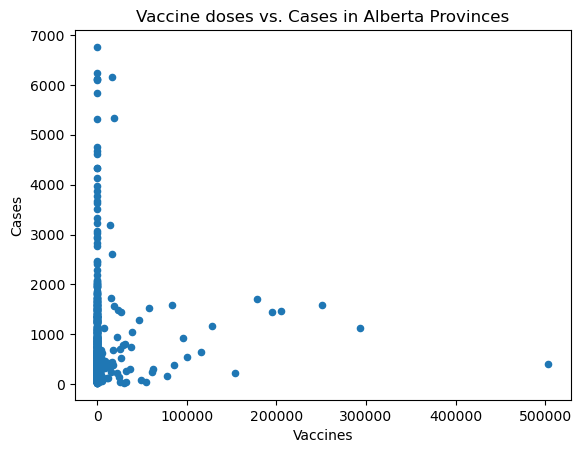

In [71]:
import matplotlib.pyplot as plt

AB_provinces_df.plot(kind="scatter", x="Vaccine dose 1", y="Cases")
plt.title("Vaccine doses vs. Cases in Alberta Provinces")
plt.xlabel("Vaccines")
plt.ylabel("Cases")
plt.show()


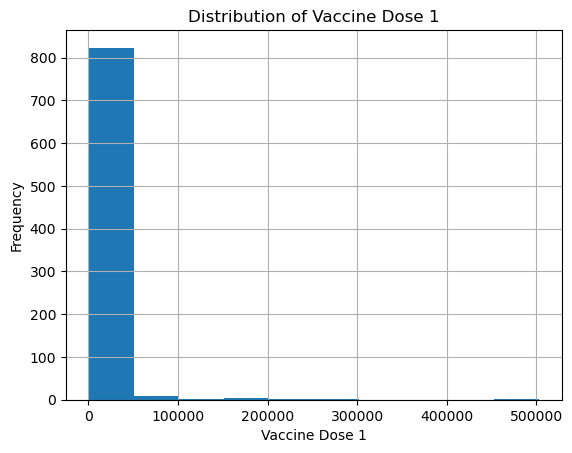

In [67]:


AB_provinces_df["Vaccine dose 1"].hist(bins=10) # create histogram with 10 bins
plt.xlabel("Vaccine Dose 1")
plt.ylabel("Frequency")
plt.title("Distribution of Vaccine Dose 1")
plt.show()

In [49]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][1])
    
    
# Create a pandas DataFrame to store the data
BC_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    BC_provinces_df.loc[index,"Date"] = data["date"]
    BC_provinces_df.loc[index,"Province"] = data["region"]
    BC_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    BC_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    BC_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    BC_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    BC_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    BC_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    BC_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    BC_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    BC_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    BC_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    BC_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    BC_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    BC_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    BC_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [51]:
BC_provinces_df.tail(50)

,Date,Province,Vaccine dose 1,Booster vaccine 2,Booster vaccine 3,Booster vaccine 4,Total vaccine,Vaccine coverage dose 1,Vaccine coverage booster 2,Vaccine coverage booster 3,Vaccine coverage booster 4,Cases,Deaths,Hospitalizations,ICU,Tests Completed,Deaths
791,2023-02-13,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0
792,2023-02-14,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0
793,2023-02-15,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0
794,2023-02-16,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,5.0,-10.0,0.0,0.0
795,2023-02-17,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,0.0,0.0
796,2023-02-18,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,35.0,0.0,0.0,0.0,35.0
797,2023-02-19,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0
798,2023-02-20,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0
799,2023-02-21,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0
800,2023-02-22,BC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][2])

# Create a pandas DataFrame to store the data
MB_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    MB_provinces_df.loc[index,"Date"] = data["date"]
    MB_provinces_df.loc[index,"Province"] = data["region"]
    MB_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    MB_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    MB_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    MB_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    MB_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    MB_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    MB_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    MB_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    MB_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    MB_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    MB_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    MB_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    MB_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    MB_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
MB_provinces_df

In [ ]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][3])

# Create a pandas DataFrame to store the data
NB_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    NB_provinces_df.loc[index,"Date"] = data["date"]
    NB_provinces_df.loc[index,"Province"] = data["region"]
    NB_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    NB_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    NB_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    NB_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    NB_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    NB_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    NB_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    NB_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    NB_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    NB_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    NB_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    NB_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    NB_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    NB_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][4])

# Create a pandas DataFrame to store the data
NL_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    NL_provinces_df.loc[index,"Date"] = data["date"]
    NL_provinces_df.loc[index,"Province"] = data["region"]
    NL_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    NL_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    NL_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    NL_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    NL_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    NL_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    NL_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    NL_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    NL_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    NL_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    NL_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    NL_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    NL_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    NL_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [54]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][5])

# Create a pandas DataFrame to store the data
NS_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    NS_provinces_df.loc[index,"Date"] = data["date"]
    NS_provinces_df.loc[index,"Province"] = data["region"]
    NS_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    NS_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    NS_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    NS_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    NS_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    NS_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    NS_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    NS_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    NS_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    NS_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    NS_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    NS_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    NS_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    NS_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

KeyboardInterrupt: 

In [ ]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []
# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][6])

# Create a pandas DataFrame to store the data
NT_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    NT_provinces_df.loc[index,"Date"] = data["date"]
    NT_provinces_df.loc[index,"Province"] = data["region"]
    NT_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    NT_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    NT_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    NT_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    NT_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    NT_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    NT_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    NT_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    NT_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    NT_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    NT_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    NT_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    NT_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    NT_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][7])

# Create a pandas DataFrame to store the data
NU_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    NU_provinces_df.loc[index,"Date"] = data["date"]
    NU_provinces_df.loc[index,"Province"] = data["region"]
    NU_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    NU_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    NU_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    NU_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    NU_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    NU_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    NU_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    NU_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    NU_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    NU_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    NU_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    NU_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    NU_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    NU_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][8])

# Create a pandas DataFrame to store the data
ON_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    ON_provinces_df.loc[index,"Date"] = data["date"]
    ON_provinces_df.loc[index,"Province"] = data["region"]
    ON_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    ON_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    ON_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    ON_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    ON_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    ON_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    ON_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    ON_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    ON_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    ON_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    ON_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    ON_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    ON_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    ON_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []

# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][9])

# Create a pandas DataFrame to store the data
PE_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    PE_provinces_df.loc[index,"Date"] = data["date"]
    PE_provinces_df.loc[index,"Province"] = data["region"]
    PE_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    PE_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    PE_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    PE_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    PE_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    PE_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    PE_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    PE_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    PE_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    PE_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    PE_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    PE_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    PE_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    PE_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][10])

# Create a pandas DataFrame to store the data
QC_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    QC_provinces_df.loc[index,"Date"] = data["date"]
    QC_provinces_df.loc[index,"Province"] = data["region"]
    QC_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    QC_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    QC_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    QC_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    QC_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    QC_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    QC_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    QC_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    QC_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    QC_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    QC_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    QC_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    QC_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    QC_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Define the start and end dates of the range you want to retrieve
start_date = "2020-12-14"
end_date = "2023-04-03"

# Convert the dates to Python datetime objects
start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Create an empty list to store the response data
response_data = []


# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][11])

# Create a pandas DataFrame to store the data
SK_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    SK_provinces_df.loc[index,"Date"] = data["date"]
    SK_provinces_df.loc[index,"Province"] = data["region"]
    SK_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    SK_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    SK_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    SK_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    SK_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    SK_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    SK_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    SK_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    SK_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    SK_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    SK_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    SK_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    SK_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    SK_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]

In [ ]:
# Loop through each date in the range and retrieve the data
for dt in pd.date_range(start_dt, end_dt):
    date_str = dt.strftime("%Y-%m-%d")
    base_url = f"https://api.opencovid.ca/summary?date={date_str}&geo=pt&fill=true&version=true&pt_names=short&hr_names=hruid&fmt=json"
    response = requests.get(base_url).json()
    response_data.append(response["data"][12])

# Create a pandas DataFrame to store the data
YT_provinces_df = pd.DataFrame(columns=["Date"
                                     , "Province"
                                     , "Vaccine dose 1"
                                     , "Booster vaccine 2"
                                     , "Booster vaccine 3"
                                     , "Booster vaccine 4"
                                     , "Total vaccine"
                                     , "Vaccine coverage dose 1"
                                     , "Vaccine coverage booster 2"
                                     , "Vaccine coverage booster 3"
                                     , "Vaccine coverage booster 4"
                                     , "Cases"
                                     , "Deaths"
                                     , "Hospitalizations"
                                     , "ICU"
                                     , "Tests Completed"
                                     , "Deaths"
                                    ])

# Loop through each dictionary in the response_data list and extract the relevant data into the DataFrame
for index, data in enumerate(response_data):
    YT_provinces_df.loc[index,"Date"] = data["date"]
    YT_provinces_df.loc[index,"Province"] = data["region"]
    YT_provinces_df.loc[index,"Vaccine dose 1"] = data["vaccine_administration_dose_1_daily"]
    YT_provinces_df.loc[index,"Booster vaccine 2"] = data["vaccine_administration_dose_2_daily"]
    YT_provinces_df.loc[index,"Booster vaccine 3"] = data["vaccine_administration_dose_3_daily"]
    YT_provinces_df.loc[index,"Booster vaccine 4"] = data["vaccine_administration_dose_4_daily"]
    YT_provinces_df.loc[index,"Total vaccine"] = data["vaccine_administration_total_doses_daily"]
    YT_provinces_df.loc[index,"Vaccine coverage dose 1"] = data["vaccine_coverage_dose_1_daily"]
    YT_provinces_df.loc[index,"Vaccine coverage booster 2"] = data["vaccine_coverage_dose_2_daily"]
    YT_provinces_df.loc[index,"Vaccine coverage booster 3"] = data["vaccine_coverage_dose_3_daily"]
    YT_provinces_df.loc[index,"Vaccine coverage booster 4"] = data["vaccine_coverage_dose_4_daily"]
    YT_provinces_df.loc[index,"Cases"] = data["cases_daily"]
    YT_provinces_df.loc[index,"Deaths"] = data["deaths_daily"]
    YT_provinces_df.loc[index,"Hospitalizations"] = data["hospitalizations_daily"]
    YT_provinces_df.loc[index,"ICU"] = data["icu_daily"]
    YT_provinces_df.loc[index,"Tests Completed"] = data["tests_completed_daily"]